In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('vgsales.csv')

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# Preparación y agrupación de datos para visualización
filtered_data = data[['Year', 'Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']] #Filtrar columnas necesarias
grouped_data = filtered_data.groupby(['Year', 'Genre']).sum().reset_index() #Agrupar las ventas por genero y año de lanzamiento
grouped_data['Total_Sales'] = grouped_data[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1) #Nueva columna ventas totales

In [9]:
grouped_data.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980.0,Action,0.32,0.02,0.0,0.00,0.34
1,1980.0,Fighting,0.72,0.04,0.0,0.01,0.77
2,1980.0,Misc,2.53,0.15,0.0,0.02,2.70
3,1980.0,Shooter,6.56,0.43,0.0,0.08,7.07
4,1980.0,Sports,0.46,0.03,0.0,0.01,0.50


In [10]:
# Pivotear los datos para preparar el grafico apilado
pivot_data = grouped_data.pivot_table(values = 'Total_Sales', index = 'Year', columns = 'Genre', aggfunc = 'sum', fill_value = 0)

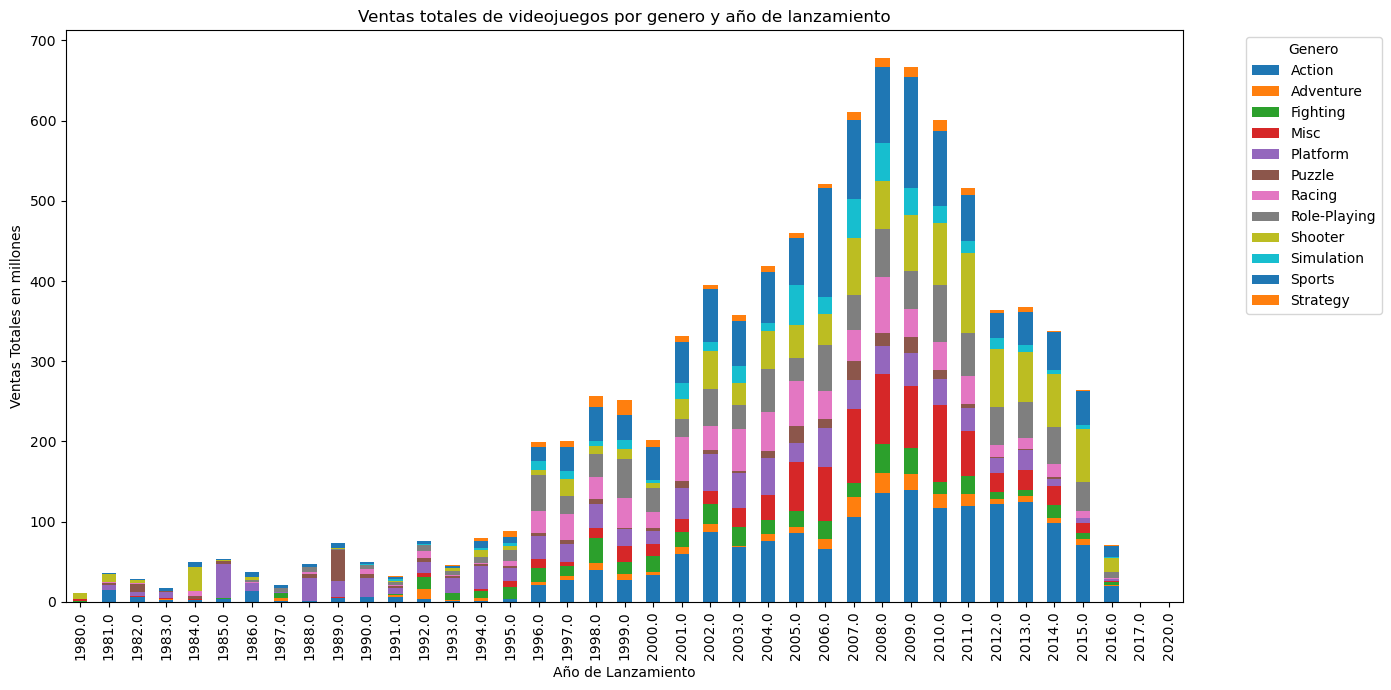

In [12]:
# Crear grafico
pivot_data.plot(kind = 'bar', stacked = True, figsize = (14,7))
plt.title('Ventas totales de videojuegos por genero y año de lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales en millones')
plt.legend(title = 'Genero', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

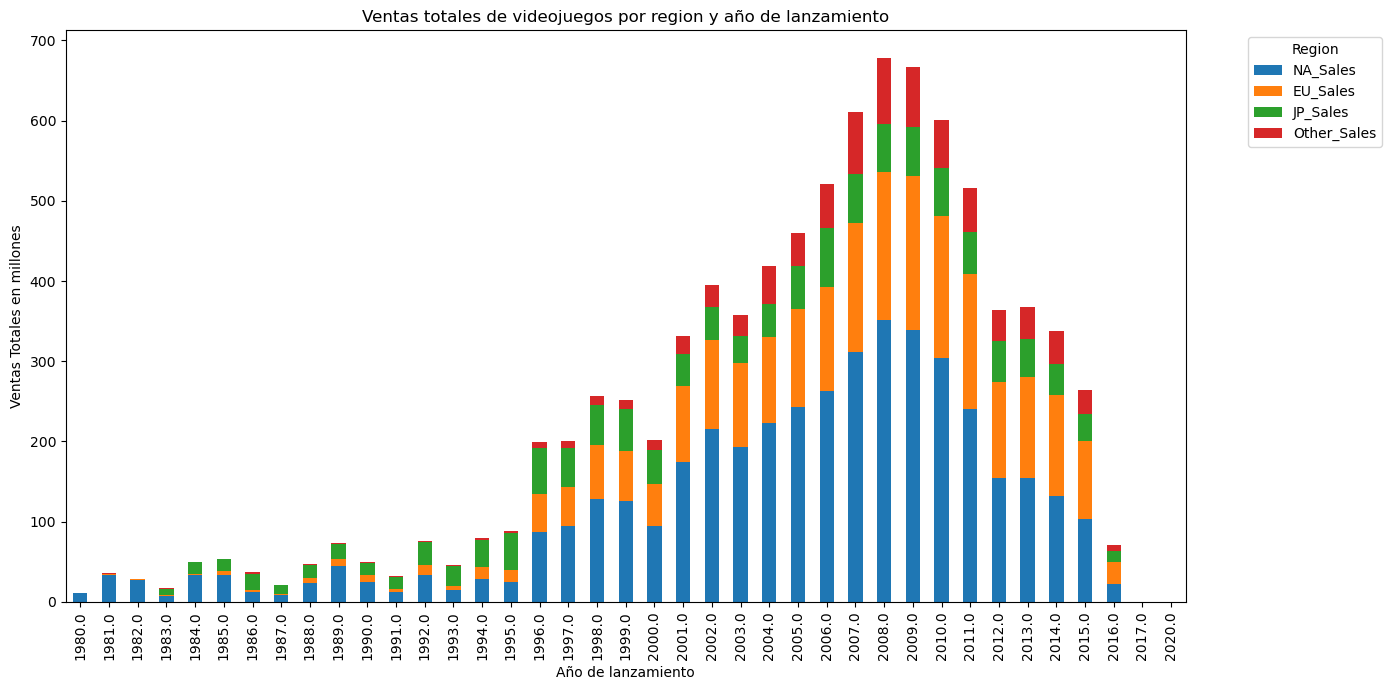

In [18]:
# Creación de un grafico apilado de ventas por region
region_grouped_data = filtered_data.groupby(['Year']).sum().reset_index() #Agrupar las ventas por año de lanzamiento y region
region_grouped_data.set_index('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind = 'bar', stacked = True, figsize = (14, 7))
plt.title('Ventas totales de videojuegos por region y año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas Totales en millones')
plt.legend(title = 'Region', bbox_to_anchor = (1.05, 1), loc = ('upper left'))
plt.tight_layout()
plt.show()